<h1><center>Analytics Task Gourab Hazra (July 5th, 2021)</center></h1>

### List of imports / libraries used

In [1]:
# By order of usage

import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

### Listing files in current work directory

In [2]:
files = os.listdir(os.curdir)
files

['.ipynb_checkpoints',
 '2.mp4',
 'Assignment - Data Analytics - Dhruv (1).pdf',
 'desktop.ini',
 'Dhruv_Task_Gourab_Hazra_05July.ipynb',
 'DS',
 'factor-trait-report_gourab-hazra.pdf',
 'Jobs opps 05072021.pdf',
 'newsbytesapp-game-of-ur-32bfad68a549',
 'rgu-master.zip',
 'Sample Survey.xlsx',
 'Torrent',
 'Ur-AI-master.zip',
 '~$Sample Survey.xlsx']

### 1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [3]:
# Storing data from excel as dataframe

survey = pd.read_excel('Sample Survey.xlsx', sheet_name= 1)

# View the data types
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

# Answer

In [4]:
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


### 2. How many samples were collected on each day?

# Answer

In [5]:
# Each day sample collection
samples = survey['collection_date'].value_counts()

# Store in dict
counts = survey['collection_date'].value_counts().to_dict()
print(samples, '\n\n', counts)

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64 

 {Timestamp('2020-08-24 00:00:00'): 1479, Timestamp('2020-08-25 00:00:00'): 998, Timestamp('2020-08-28 00:00:00'): 761, Timestamp('2020-08-27 00:00:00'): 665, Timestamp('2020-08-29 00:00:00'): 620, Timestamp('2020-09-01 00:00:00'): 607, Timestamp('2020-08-26 00:00:00'): 598, Timestamp('2020-08-30 00:00:00'): 582, Timestamp('2020-08-31 00:00:00'): 557}


### 3. What proportion of the total respondents were aged less than 45?

In [6]:
# Converting object type to string for age column

survey['age'] = survey['age'].astype('string')
survey.age

0       26
1       34
2       25
3       36
4       22
        ..
6862    25
6863    30
6864    20
6865    23
6866    33
Name: age, Length: 6867, dtype: string

In [7]:
# Filter out non string values like 'ko' from '24ko' without deleting the record

survey['age'] = survey.age.str.extract('(\d+)')

In [8]:
# Convert back to int

survey['age'] = survey['age'].astype(int)

In [9]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   int32         
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [10]:
#Filter out values strictly less than 45

less45 = survey[survey['age'] < 45].count()[0]
less45

6399

In [11]:
# Rest are greater than (or equal to) 45. Rest = Total-less than 45

total = len(survey)

greater45 = total - less45
greater45

468

# Answer

([<matplotlib.patches.Wedge at 0x211d5cd6370>,
 [Text(-1.074883443814388, 0.2337211633843236, 'Less than age 45'),
  Text(1.074883460226301, -0.23372108790593513, 'Greater than age 45')],
 [Text(-0.5863000602623933, 0.12748427093690376, '93%'),
  Text(0.586300069214346, -0.1274842297668737, '7%')])

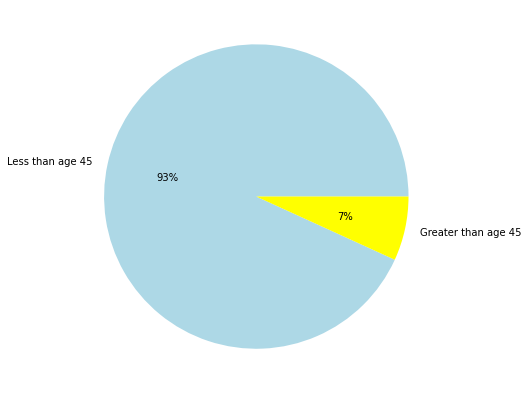

In [12]:
props = ["Less than age 45", "Greater than age 45"]
data = [ less45, greater45 ]
colours = ["lightblue", "yellow"]
# Creating plot
fig = plt.figure(figsize =(15, 7))
plt.pie(data, labels = props, autopct='%1.0f%%', colors = colours)

### 4. Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation: 

response_id age age_group   
1 26 25-40   
2 34 25-40   
3 25 25-40   
4 66 55+   

In [13]:
# Initializing the df with required existing columns

age_group = survey[["response_id","age"]]
age_group

,response_id,age
0,1,26
1,2,34
2,3,25
3,4,36
4,5,22
...,...,...
6862,6863,25
6863,6864,30
6864,6865,20
6865,6866,23


In [14]:
# Creating age groups as dataframes ran1, ran2, ran3 and ran4 for the respective age groups

ran1= age_group.loc[(age_group['age'] >=18) & (age_group['age'] < 25)]
ran1["age_group"] = "18-25"
ran1

<ipython-input-14-e352b78ebdfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran1["age_group"] = "18-25"


,response_id,age,age_group
4,5,22,18-25
8,9,23,18-25
14,15,24,18-25
16,17,24,18-25
18,19,23,18-25
...,...,...,...
6858,6859,24,18-25
6859,6860,21,18-25
6861,6862,22,18-25
6864,6865,20,18-25


In [15]:
ran2= age_group.loc[(age_group['age'] >= 25) & (age_group['age'] < 40)]
ran2["age_group"] = "25-40"
ran2

<ipython-input-15-4bfcebcc44e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran2["age_group"] = "25-40"


,response_id,age,age_group
0,1,26,25-40
1,2,34,25-40
2,3,25,25-40
3,4,36,25-40
5,6,38,25-40
...,...,...,...
6855,6856,30,25-40
6860,6861,25,25-40
6862,6863,25,25-40
6863,6864,30,25-40


In [16]:
ran3= age_group.loc[(age_group['age'] >= 40) & (age_group['age'] < 55)]
ran3["age_group"] = "40-55"
ran3

<ipython-input-16-e9e9c129b219>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran3["age_group"] = "40-55"


,response_id,age,age_group
11,12,42,40-55
12,13,51,40-55
28,29,44,40-55
30,31,44,40-55
33,34,53,40-55
...,...,...,...
6816,6817,40,40-55
6819,6820,40,40-55
6829,6830,48,40-55
6840,6841,45,40-55


In [17]:
ran4= age_group.loc[(age_group['age'] >= 55)]
ran4["age_group"] = "55+"
ran4

<ipython-input-17-41adee2046b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran4["age_group"] = "55+"


,response_id,age,age_group
69,70,74,55+
74,75,70,55+
121,122,58,55+
126,127,56,55+
183,184,55,55+
...,...,...,...
6649,6650,55,55+
6702,6703,68,55+
6720,6721,76,55+
6787,6788,60,55+


In [18]:
# Merging filtered values

frames = [ran1, ran2, ran3, ran4]
age_group = pd.concat(frames)

# Answer

In [19]:
age_group.reset_index(drop=True, inplace=True)
age_group

,response_id,age,age_group
0,5,22,18-25
1,9,23,18-25
2,15,24,18-25
3,17,24,18-25
4,19,23,18-25
...,...,...,...
6862,6650,55,55+
6863,6703,68,55+
6864,6721,76,55+
6865,6788,60,55+


### 5. How many samples were collected for each age-group? Which age-group had the most samples?

# Answer

In [20]:
# Creating dictionary for automatic updation of values during display

age_counts = {"18-25": len(ran1), "25-40": len(ran2), "40-55": len(ran3), "55+": len(ran4)}

print("Age groups had the following number of samples respectively\n18-25:",
      age_counts["18-25"],"\n25-40:", age_counts["25-40"],"\n40-55:", age_counts["40-55"],"\n55+:", age_counts["55+"])

Age groups had the following number of samples respectively
18-25: 2094 
25-40: 3844 
40-55: 801 
55+: 128


In [21]:
max_key = max(age_counts, key=age_counts.get)
max_value = max(age_counts.values())
print("Age", max_key ,"had the most samples =", max_value)

Age 25-40 had the most samples = 3844


### 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [22]:
# Converting object type to string

survey["Vote_Now"] = survey["Vote_Now"].astype('string')
survey["Past_Vote"] = survey["Past_Vote"].astype('string')

In [23]:
#Filter by values where Past_Vote=Current_Vote

common=survey.loc[survey['Vote_Now']==survey["Past_Vote"]]
print(len(common))
common.head()

2910


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
9,10,2020-08-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059
10,11,2020-08-24,Urban,12th Pass,"₹ 5,000 - ₹ 10,000",BJP,BJP,Somewhat Satisfied,Somewhat Dissatisfied,38,Male,181,EBC,3.850583


In [24]:
# Finding vote counts of all parties

vote_count= common['Vote_Now'].value_counts()
vote_count

BJP           1630
RJD            811
JD(U)          279
INC             57
NOTA            46
JAP(L)          35
Left Front      18
RLSP            12
LJP              9
Others           6
BSP              5
VIP              1
HAM              1
Name: Vote_Now, dtype: Int64

In [25]:
# Further filtering where party is RJD

party = "RJD"
rjd= vote_count[party]
print(rjd)

811


In [26]:
# total defined before as length of survey table

rest = total - rjd
print(rest)

6056


# Answer

([<matplotlib.patches.Wedge at 0x211d5c98220>,
 [Text(1.0251516511139633, 0.3988283994631211, 'Voted for RJD Both times'),
  Text(-1.0251516511139633, -0.3988283994631212, 'Did not vote for RJD both times')],
 [Text(0.5591736278803436, 0.2175427633435206, '12%'),
  Text(-0.5591736278803435, -0.21754276334352063, '88%')])

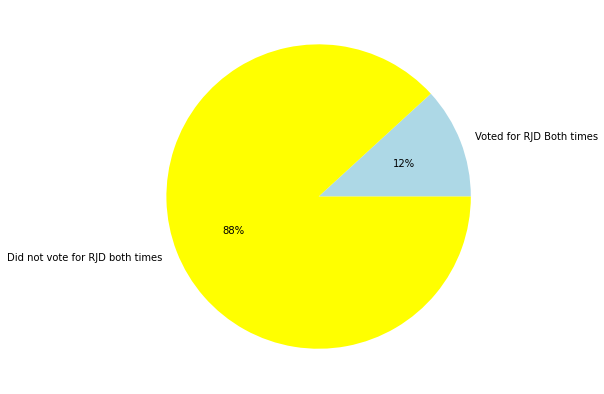

In [27]:
props = ["Voted for RJD Both times", "Did not vote for RJD both times"]
data = [ rjd, rest ]
  
# Creating plot (colurs were defined in earlier plot)
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = props, autopct='%1.0f%%', colors = colours)

### 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [28]:
# Converting object type to string

survey["CM_satisfaction"] = survey["CM_satisfaction"].astype('string')

In [29]:
# Filter to get only fully satisfied CMs

satisfy = survey[survey.CM_satisfaction == "Fully Satisfied"]
satisfy

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
14,15,2020-08-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477
17,18,2020-08-24,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242
28,29,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,6852,2020-09-01,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,66,Male,165,Gen,0.300990
6852,6853,2020-09-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",Undecided,BJP,Fully Satisfied,Fully Satisfied,28,Male,149,SC,0.983441
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [30]:
# Fully satisfied CM counts daywise

satis = satisfy['collection_date'].value_counts()
satis

2020-08-24    146
2020-08-25     95
2020-08-28     92
2020-09-01     75
2020-08-29     73
2020-08-30     65
2020-08-31     62
2020-08-26     59
2020-08-27     54
Name: collection_date, dtype: int64

In [31]:
# Total count of samples from before (day-wise)

samples

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

In [32]:
# Merging into single dataframe

df = pd.concat([samples.rename('total'), satis.rename('satisfied')], axis=1)
df

,total,satisfied
2020-08-24,1479,146
2020-08-25,998,95
2020-08-26,598,59
2020-08-27,665,54
2020-08-28,761,92
2020-08-29,620,73
2020-08-30,582,65
2020-08-31,557,62
2020-09-01,607,75


In [33]:
# Calcualting proportion values

df["proportion"] = df["satisfied"]/df["total"]
df

,total,satisfied,proportion
2020-08-24,1479,146,0.098715
2020-08-25,998,95,0.095190
2020-08-26,598,59,0.098662
2020-08-27,665,54,0.081203
2020-08-28,761,92,0.120894
2020-08-29,620,73,0.117742
2020-08-30,582,65,0.111684
2020-08-31,557,62,0.111311
2020-09-01,607,75,0.123558


# Answer

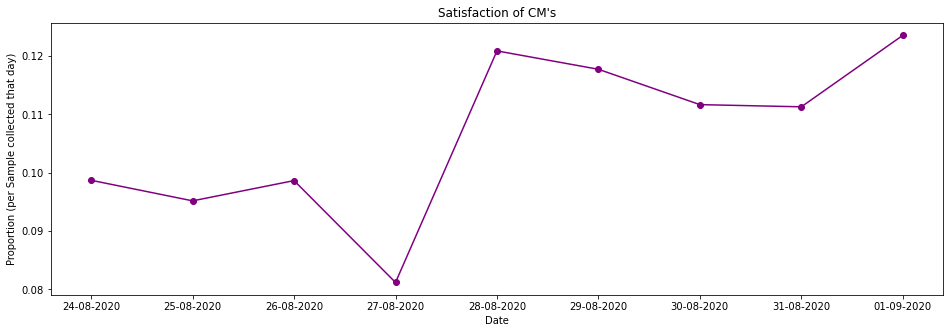

In [34]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(df.index.values, df['proportion'].values, '-o', color='purple')
ax.set(xlabel="Date", ylabel="Proportion (per Sample collected that day)", title="Satisfaction of CM's")

# Format the x axis
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
plt.show()


### 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [35]:
# Converting object type to string

survey["MLA_satisfaction"] = survey["MLA_satisfaction"].astype('string')

In [36]:
# Filter out Dissatisfied MLA's

unsatisfy = survey[survey.MLA_satisfaction == "Fully Dissatisfied"]
unsatisfy

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
5,6,2020-08-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603
6,7,2020-08-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,6856,2020-09-01,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",NOTA,JD(U),Fully Dissatisfied,Fully Dissatisfied,30,Male,241,EBC,0.174156
6857,6858,2020-09-01,Rural,12th Pass,"BPL/Below ₹ 5,000",RJJP,BJP,Fully Dissatisfied,Fully Dissatisfied,22,Male,168,Gen,0.085758
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780


In [37]:
# Fully dissatisfied MLA counts

unsatis = unsatisfy['collection_date'].value_counts()
unsatis

2020-08-24    887
2020-08-25    630
2020-08-28    462
2020-08-27    403
2020-09-01    385
2020-08-30    361
2020-08-26    353
2020-08-29    350
2020-08-31    321
Name: collection_date, dtype: int64

In [38]:
# Merging into single dataframe

df = pd.concat([samples.rename('total'), unsatis.rename('unsatisfied')], axis=1)
df

,total,unsatisfied
2020-08-24,1479,887
2020-08-25,998,630
2020-08-26,598,353
2020-08-27,665,403
2020-08-28,761,462
2020-08-29,620,350
2020-08-30,582,361
2020-08-31,557,321
2020-09-01,607,385


In [39]:
# Calculating proportion values

df["proportion"] = df["unsatisfied"]/df["total"]
df

,total,unsatisfied,proportion
2020-08-24,1479,887,0.599730
2020-08-25,998,630,0.631263
2020-08-26,598,353,0.590301
2020-08-27,665,403,0.606015
2020-08-28,761,462,0.607096
2020-08-29,620,350,0.564516
2020-08-30,582,361,0.620275
2020-08-31,557,321,0.576302
2020-09-01,607,385,0.634267


# Answer

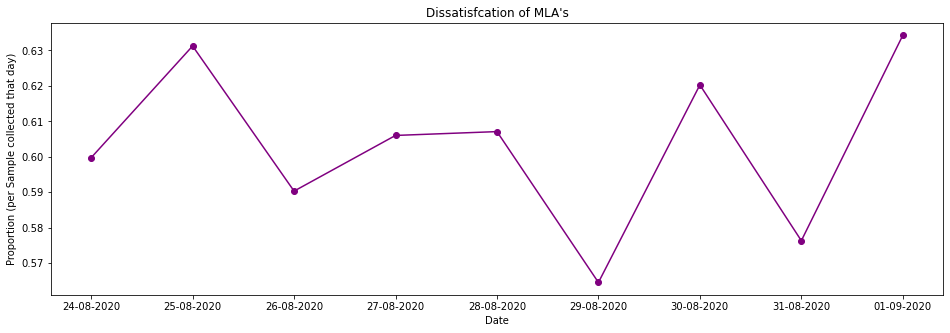

In [40]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(df.index.values, df['proportion'].values, '-o', color='purple')
ax.set(xlabel="Date", ylabel="Proportion (per Sample collected that day)", title="Dissatisfcation of MLA's")

# Format the x axis
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))

plt.show()

### 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [41]:
# Reviewing data types

survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   string        
 6   Past_Vote         6867 non-null   string        
 7   CM_satisfaction   6867 non-null   string        
 8   MLA_satisfaction  6867 non-null   string        
 9   age               6867 non-null   int32         
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

# Answer

In [42]:
# Created pivot table and added margins to verify totals and used response_id for counts

table1 = pd.pivot_table(data=survey, values= "response_id", index='Past_Vote', columns='Vote_Now', aggfunc='count', margins=True)
table1

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP,All
Past_Vote,,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0,2823
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0,804
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN,50
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN,213
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,42
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0,1374
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN,125
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0,30


### 10. Repeat the above question with the cell values as the sum of “weight”.

# Answer

In [43]:
# Added margins to verify totals. Values set as weight and agg func as sum.

table2 = pd.pivot_table(data=survey, values = 'weight', index='Past_Vote', columns='Vote_Now', aggfunc='sum', margins = True )
table2

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP,All
Past_Vote,,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691,1819.705752
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.137719
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552,565.582563
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN,42.110354
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN,429.978586
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN,69.749576
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288,1873.120263
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN,192.112418
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887,68.229827


### 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [44]:
# Displaying dataframe created earlier

age_group

,response_id,age,age_group
0,5,22,18-25
1,9,23,18-25
2,15,24,18-25
3,17,24,18-25
4,19,23,18-25
...,...,...,...
6862,6650,55,55+
6863,6703,68,55+
6864,6721,76,55+
6865,6788,60,55+


In [45]:
# grouping by age_group and showing the count values

grpcount = age_group.groupby('age_group').count()

# Answer

In [46]:
grpcount

,response_id,age
age_group,,
18-25,2094,2094
25-40,3844,3844
40-55,801,801
55+,128,128


### 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [47]:
# Getting all rows where Vote_now is JD(U) by response_id

commonjdu= survey.loc[survey['Vote_Now']=="JD(U)"]
jdu = pd.DataFrame(commonjdu['response_id'], columns= ["response_id"])
jdu.reset_index(drop=True, inplace=True)

jdu

,response_id
0,5
1,14
2,29
3,30
4,60
...,...
521,6770
522,6788
523,6830
524,6844


In [48]:
# performing inner join between jdu and age_group dataframe on response_id

merged_inner = pd.merge(left=jdu, right=age_group, left_on='response_id', right_on='response_id')

In [49]:
print(merged_inner)

     response_id  age age_group
0              5   22     18-25
1             14   29     25-40
2             29   44     40-55
3             30   26     25-40
4             60   48     40-55
..           ...  ...       ...
521         6770   46     40-55
522         6788   60       55+
523         6830   48     40-55
524         6844   24     18-25
525         6863   25     25-40

[526 rows x 3 columns]


# Answer

In [50]:
# Performing group by on filtered values

age_groupjdu = merged_inner.groupby('age_group').count()
age_groupjdu

,response_id,age
age_group,,
18-25,181,181
25-40,264,264
40-55,68,68
55+,13,13


### 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [51]:
# Displaying dfs from q12 and q11

age_groupjdu

,response_id,age
age_group,,
18-25,181,181
25-40,264,264
40-55,68,68
55+,13,13


In [52]:
grpcount

,response_id,age
age_group,,
18-25,2094,2094
25-40,3844,3844
40-55,801,801
55+,128,128


In [53]:
merged_inner_grouped = pd.merge(left=age_groupjdu, right=grpcount, left_on='age_group', right_on='age_group')

# Answer

In [54]:
merged_inner_grouped

,response_id_x,age_x,response_id_y,age_y
age_group,,,,
18-25,181,181,2094,2094
25-40,264,264,3844,3844
40-55,68,68,801,801
55+,13,13,128,128
